In [94]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/cities_r2.csv")
df

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,Vizianagaram,28,ANDHRA PRADESH,12,227533,111596,115937,20487,10495,9992,...,80306,1039,952,81.85,88.18,75.80,"18.1066576,83.3955506",30656,19173,11483
489,Warangal,28,ANDHRA PRADESH,9,620116,310400,309716,55392,28434,26958,...,217136,998,948,84.16,91.54,76.79,"17.9689008,79.5940544",109613,69507,40106
490,Wardha,27,MAHARASHTRA,8,105543,53241,52302,9754,5139,4615,...,43339,982,898,94.05,97.19,90.88,"20.745319,78.6021946",19363,10645,8718
491,Yamunanagar,6,HARYANA,3,216628,115404,101224,22905,12556,10349,...,74255,877,824,85.91,89.61,81.71,"30.1290485,77.2673901",29803,14349,15454


In [8]:
df.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [27]:
df.isnull().sum()

,0
name_of_city,0
state_code,0
state_name,0
dist_code,0
population_total,0
population_male,0
population_female,0
0-6_population_total,0
0-6_population_male,0
0-6_population_female,0


In [95]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
x=df[['total_graduates']]
x_scale=scale.fit_transform(x)

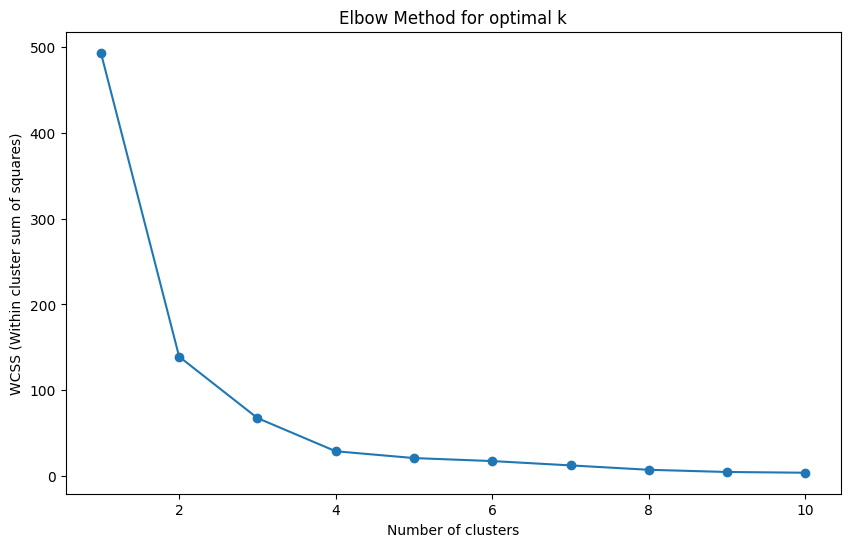

In [96]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia=[]
k_range=range(1,11)
for k in k_range:
  kmeans=KMeans(n_clusters=k,random_state=0)
  kmeans.fit(x_scale)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11),inertia,marker='o')
plt.title('Elbow Method for optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within cluster sum of squares)')
plt.show()

In [97]:
# Fit the K-Means model with the optimal number of clusters (say k=4 from Elbow method)
kmeans=KMeans(n_clusters=3,random_state=42)
df['Cluster']=kmeans.fit_predict(x_scale)
# Show the cluster labels for the first few rows
print(df[['name_of_city', 'total_graduates', 'Cluster']].head())

  name_of_city  total_graduates  Cluster
0      Abohar             16287        1
1    Achalpur              8863        1
2    Adilabad             10565        1
3   Adityapur             19225        1
4       Adoni             11902        1


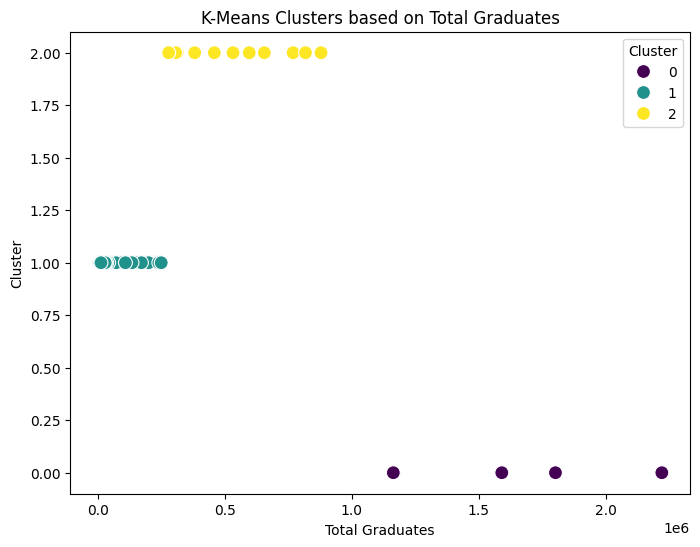

In [100]:
# Plotting the clusters
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_graduates', y='Cluster', data=df, hue='Cluster', palette='viridis', s=100)
plt.xlabel('Total Graduates')
plt.title('K-Means Clusters based on Total Graduates')
plt.show()

In [18]:
# Centroids of the clusters
print("Cluster Centroids (Total Graduates):")
print(kmeans.cluster_centers_)

# Group cities by clusters
cluster_summary = df.groupby('Cluster')['name_of_city'].apply(list)
print(cluster_summary)

Cluster Centroids (Total Graduates):
[[ 3.98515199]
 [-0.21548262]
 [ 0.66322406]
 [10.1630973 ]]
Cluster
0                    [7, 118, 183, 224, 273, 287, 379]
1    [0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 1...
2    [6, 16, 26, 34, 58, 90, 91, 114, 127, 129, 138...
3                                       [71, 140, 184]
Name: name_of_city, dtype: object


In [69]:
dff=pd.read_csv("/content/Social_Network_Ads.csv")
dff

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [71]:
dff.isnull().sum()


,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [74]:
from sklearn.preprocessing import StandardScaler
x=dff[['EstimatedSalary']]
scale=StandardScaler()
x_scale=scale.fit_transform(x)

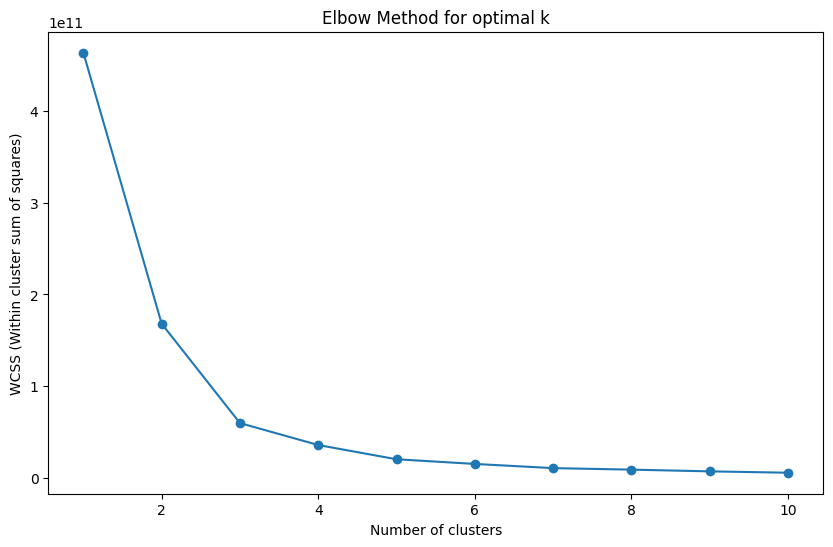

In [86]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss=[]
k_range=range(1,11)
for k in k_range:
  kmeans=KMeans(n_clusters=k,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow Method for optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within cluster sum of squares)')
plt.show()

In [79]:
# Apply K-Means with the chosen number of clusters (let's assume k=4 for example)
kmeans=KMeans(n_clusters=4,random_state=42)
dff['Cluster']=kmeans.fit_predict(x)
# Show the first few rows with cluster labels
print(dff[['User ID', 'Age', 'EstimatedSalary', 'Cluster']].head())


    User ID  Age  EstimatedSalary  Cluster
0  15624510   19            19000        1
1  15810944   35            20000        1
2  15668575   26            43000        1
3  15603246   27            57000        0
4  15804002   19            76000        2


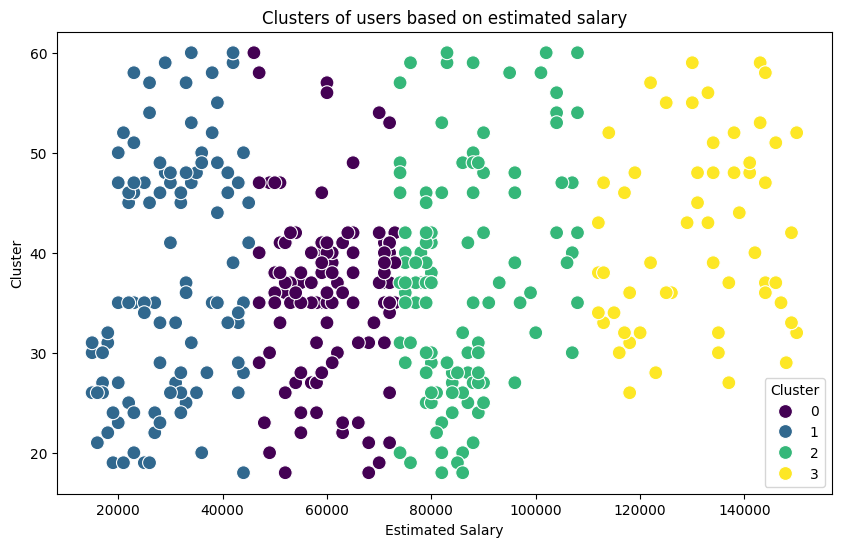

In [85]:
# Visualize the clusters
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(data=dff ,x = 'EstimatedSalary',y='Age',hue='Cluster',palette='viridis',s=100)
plt.title('Clusters of users based on estimated salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Cluster')
plt.legend(title='Cluster')
plt.show()

In [70]:
# Cluster Centroids (average Age and EstimatedSalary for each cluster)
print("Cluster Centroids:")
print(kmeans.cluster_centers_)

# Grouping users by their clusters
cluster_summary = dff.groupby('Cluster').agg({'Age': 'mean', 'EstimatedSalary': 'mean', 'Purchased': 'mean'})
print(cluster_summary)


Cluster Centroids:
[[-1.07141853 -0.82719577]
 [-0.25848547  0.18751532]
 [ 1.13009627 -0.79340365]
 [ 0.79573049  1.53412615]]
               Age  EstimatedSalary  Purchased
Cluster                                       
0        26.437500     41572.916667   0.000000
1        34.948718     76128.205128   0.147436
2        49.486842     42723.684211   0.710526
3        45.986111    121986.111111   0.916667


1. Which cluster does P6 belong to?
P6 belongs to Cluster 1.

2. What is the population of a cluster around m2?
The population of the cluster around m2 (Cluster 2) is 3.

3. What is the updated value of m1 and m2?
Updated centroid m1: [0.148 0.712]
Updated centroid m2: [0.24666667 0.2       ]


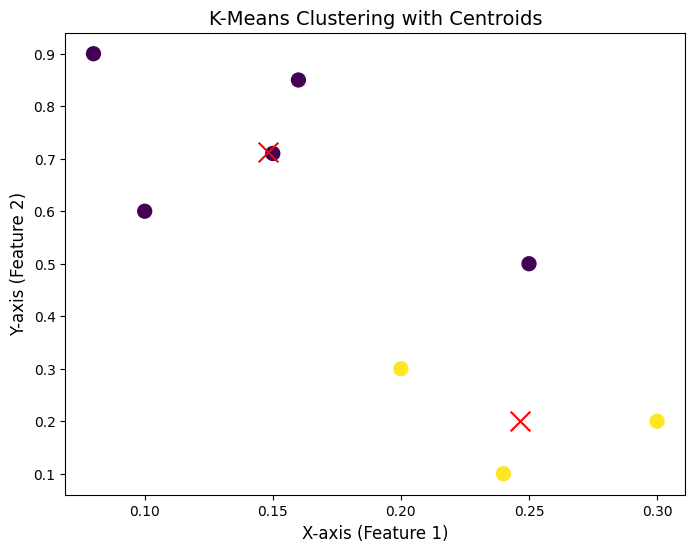

In [92]:
# Given Points (P1, P2, ..., P8)

points = np.array([
    [0.1, 0.6],   # P1
    [0.15, 0.71], # P2
    [0.08, 0.9],  # P3
    [0.16, 0.85], # P4
    [0.2, 0.3],   # P5
    [0.25, 0.5],  # P6
    [0.24, 0.1],  # P7
    [0.3, 0.2],   # P8
])
# Step 1: Perform K-Means Clustering with 2 clusters and initial centroids m1 = P1, m2 = P8
kmeans = KMeans(n_clusters=2, init=np.array([[0.1, 0.6], [0.3, 0.2]]), n_init=1, random_state=42)

# Fit the KMeans model on the points
kmeans.fit(points)

# Get the cluster labels (which cluster each point belongs to)
labels = kmeans.labels_

# Get the final centroids
final_centroids = kmeans.cluster_centers_

# Step 2: Answer the questions

# 1. Which cluster does P6 belong to? (P6 is the point at index 5)
p6_cluster = labels[5]

# 2. What is the population of a cluster around m2? (Cluster 2 has centroid m2, and the cluster is labeled as '2')
cluster_2_points = points[labels == 1]  # Cluster 2 corresponds to label '1' (since labels are 0-based)
population_cluster_2 = len(cluster_2_points)  # Population is the number of points in cluster 2

# 3. What is the updated value of m1 and m2? (The final centroids)
updated_m1 = final_centroids[0]
updated_m2 = final_centroids[1]

# Print the results
print("1. Which cluster does P6 belong to?")
print(f"P6 belongs to Cluster {p6_cluster + 1}.\n")  # Add 1 to match the cluster numbering

print("2. What is the population of a cluster around m2?")
print(f"The population of the cluster around m2 (Cluster 2) is {population_cluster_2}.\n")

print("3. What is the updated value of m1 and m2?")
print(f"Updated centroid m1: {updated_m1}")
print(f"Updated centroid m2: {updated_m2}")

# Step 3: Plotting the points and centroids
plt.figure(figsize=(8, 6))

# Plot all points, color them according to the cluster
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis', marker='o', s=100, label='Data Points')

# Mark the centroids (cm1 and m2)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', marker='x', s=200, label='Centroids')

# Labels and Title
plt.title('K-Means Clustering with Centroids', fontsize=14)
plt.xlabel('X-axis (Feature 1)', fontsize=12)
plt.ylabel('Y-axis (Feature 2)', fontsize=12)

plt.show()

kmeans.fit(points)